In [24]:

import numpy as np
import math

import pickle
from PIL import Image
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from scipy import stats
from numpy.random import randint,randn,standard_normal,random_sample
from plotly.offline import plot

from matplotlib import pyplot as plt
logmin=-.85
import plotly.graph_objects as go
def funcsig(w,X,b): # sigmoid functions
    return 1/(1+np.exp(-np.matmul(w.transpose(),X)+b))





In [7]:
def lossFun(w,M,X,b,lam):
    yi=X[:,-1]
    X=X[:,:-1].transpose()
    h=funcsig(w,X,b)
    for val in h:
        if(val>logmax):
            val=logmax
        if(val<logmin):
            val=logmin
    reg=(lam/2)*np.matmul(w.transpose(),w)
    L= -(1/M)*np.sum((np.multiply(yi,np.log(h)))+(np.multiply(1-yi,np.log(1-h)))) + reg
    return L
    


    
    

In [8]:
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst


In [9]:
def unpickle(file):
    with open(file,'rb') as fo:
        dict= pickle.load(fo,encoding ='latin1')
    return dict


In [10]:
def gradient(w,M,X,b,lam):
    yi=X[:,-1]
    X=X[:,:-1].transpose()
    h=funcsig(w,X,b)
    for val in h:
        if(val>logmax):
            val=logmax
        if(val<logmin):
            val=logmin
    X=X.transpose()
    return -(1./M)*np.matmul((yi-h).transpose(),X)+(lam*w)
    
    

In [11]:
def gradientb(w,M,X,b,lam):
    yi=X[:,-1]
    X=X[:,:-1].transpose()
    h=funcsig(w,X,b)
    return np.sum(yi-h)/M
    

In [12]:
def test_sample(w,X,b,weightclass):
    yi=X[-1]
    X=X[:-1].transpose()
    h=funcsig(w,X,b)
    return h
    

In [13]:
def gradientDescent(w,M,X,b,iters,lr,lam):
    for x in range(iters):
        L=lossFun(w,M,X,b,lam)
        G=gradient(w,M,X,b,lam)
        B=gradientb(w,M,X,b,lam)
        w=w-(lr*G)
        b=b-(lr*B)
        print("Loss After GD Update "+ str(x) + " is " + str(L))
    return w,b


    

In [14]:
def linClass(X,Y):
    w=np.random.standard_normal(1024)
    b=random_sample()
    X=np.concatenate((X,Y.T.reshape(50000,1)),axis=1)
    w,b=gradientDescent(w,50000,X,b,100,10,1e-2)
    return w,b
    #print(w)## loss becomes around .3333


In [15]:

b1=unpickle('cifar-10-batches-py/data_batch_1')
b2=unpickle('cifar-10-batches-py/data_batch_2')
b3=unpickle('cifar-10-batches-py/data_batch_3')
b4=unpickle('cifar-10-batches-py/data_batch_4')
b5=unpickle('cifar-10-batches-py/data_batch_5')
meta=unpickle('cifar-10-batches-py/batches.meta')
tb=unpickle('cifar-10-batches-py/test_batch')

label_names=['label_names']

join_data= np.concatenate((b1['data'],b2['data'],b3['data'],b4['data'],b5['data']))
join_labels= np.concatenate((b1['labels'],b2['labels'],b3['labels'],b4['labels'],b5['labels']))
#
#test_data= np.concatenate((tb['data']))
#test_labels=np.concatenate((tb['labels']))


test_data= tb['data']
test_labels=tb['labels']

join_datargb=join_data.reshape(50000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
join_datagray=grayscale(join_datargb).reshape(50000,1024)
#join_data_normalized=stats.zscore(join_datagray,axis=1)  
join_data_normalized=normalize(join_datagray,axis=1)  

#print(join_data_normalized)
    
        
# X_folds=np.array_split(join_data_normalized,5) # split into five folds
# y_folds=np.array_split(join_labels,5)
linelist=[]
for i in range(0,10):
    new_labels=np.copy(join_labels)
    for c,v in enumerate(new_labels):
        if(v==i):
            new_labels[c]=1
        else:
            new_labels[c]=0
    print("Traning Classifier with class "+ str(i))
    w,b=linClass(join_data_normalized,new_labels)
    linelist.append([w,b])
            
    
            
            

#print(join_data_normalized)

Traning Classifier with class 0
Loss After GD Update 0 is 5.571408890120847
Loss After GD Update 1 is 4.635436756997979
Loss After GD Update 2 is 3.7003260872866512
Loss After GD Update 3 is 3.0487107845822496
Loss After GD Update 4 is 2.5304794374867656
Loss After GD Update 5 is 2.1102566155486224
Loss After GD Update 6 is 1.770573551237862
Loss After GD Update 7 is 1.4954431964350556
Loss After GD Update 8 is 1.2727314921166495
Loss After GD Update 9 is 1.0923683121916203
Loss After GD Update 10 is 0.9463162169376235
Loss After GD Update 11 is 0.8280332354840974
Loss After GD Update 12 is 0.7322399435519413
Loss After GD Update 13 is 0.6546569619660051
Loss After GD Update 14 is 0.5918216698641533
Loss After GD Update 15 is 0.5409296080523975
Loss After GD Update 16 is 0.49971006983483923
Loss After GD Update 17 is 0.46632415409391526
Loss After GD Update 18 is 0.4392826768512127
Loss After GD Update 19 is 0.4173796224881078
Loss After GD Update 20 is 0.3996382755680026
Loss After GD

Loss After GD Update 75 is 0.3221419684317144
Loss After GD Update 76 is 0.32214182095630617
Loss After GD Update 77 is 0.3221416990119289
Loss After GD Update 78 is 0.3221415980098521
Loss After GD Update 79 is 0.32214151420576864
Loss After GD Update 80 is 0.32214144454219046
Loss After GD Update 81 is 0.32214138652050184
Loss After GD Update 82 is 0.3221413380970655
Loss After GD Update 83 is 0.32214129759883453
Loss After GD Update 84 is 0.32214126365478674
Loss After GD Update 85 is 0.322141235140198
Loss After GD Update 86 is 0.32214121113133115
Loss After GD Update 87 is 0.3221411908685819
Loss After GD Update 88 is 0.3221411737264873
Loss After GD Update 89 is 0.3221411591893094
Loss After GD Update 90 is 0.3221411468311457
Loss After GD Update 91 is 0.3221411362997195
Loss After GD Update 92 is 0.3221411273031593
Loss After GD Update 93 is 0.3221411195992099
Loss After GD Update 94 is 0.32214111298642206
Loss After GD Update 95 is 0.3221411072969499
Loss After GD Update 96 is 

Loss After GD Update 52 is 0.32335560695602306
Loss After GD Update 53 is 0.3233391471705819
Loss After GD Update 54 is 0.3233257729410475
Loss After GD Update 55 is 0.3233149021909678
Loss After GD Update 56 is 0.3233060630467501
Loss After GD Update 57 is 0.32329887293021853
Loss After GD Update 58 is 0.3232930216224055
Loss After GD Update 59 is 0.32328825754373514
Loss After GD Update 60 is 0.3232843766392998
Loss After GD Update 61 is 0.3232812133741655
Loss After GD Update 62 is 0.3232786334377719
Loss After GD Update 63 is 0.3232765278327164
Loss After GD Update 64 is 0.3232748080849408
Loss After GD Update 65 is 0.32327340236232627
Loss After GD Update 66 is 0.32327225232919016
Loss After GD Update 67 is 0.32327131059695613
Loss After GD Update 68 is 0.323270538657828
Loss After GD Update 69 is 0.3232699052097962
Loss After GD Update 70 is 0.3232693847987227
Loss After GD Update 71 is 0.323268956717356
Loss After GD Update 72 is 0.3232686041125508
Loss After GD Update 73 is 0.3

Loss After GD Update 30 is 0.3306472181843443
Loss After GD Update 31 is 0.32893522928669894
Loss After GD Update 32 is 0.327547382313138
Loss After GD Update 33 is 0.32642217901307713
Loss After GD Update 34 is 0.32550980315754074
Loss After GD Update 35 is 0.3247698997770327
Loss After GD Update 36 is 0.32416977679580566
Loss After GD Update 37 is 0.323682948671823
Loss After GD Update 38 is 0.3232879569845702
Loss After GD Update 39 is 0.3229674152771948
Loss After GD Update 40 is 0.3227072354979626
Loss After GD Update 41 is 0.32249600149695823
Loss After GD Update 42 is 0.3223244616104726
Loss After GD Update 43 is 0.3221851176846476
Loss After GD Update 44 is 0.3220718921999692
Loss After GD Update 45 is 0.3219798586460629
Loss After GD Update 46 is 0.3219050231215024
Loss After GD Update 47 is 0.32184414742034806
Loss After GD Update 48 is 0.3217946057193828
Loss After GD Update 49 is 0.32175426847964234
Loss After GD Update 50 is 0.32172140839030905
Loss After GD Update 51 is 0

Loss After GD Update 7 is 1.5230819229438597
Loss After GD Update 8 is 1.294805783076362
Loss After GD Update 9 is 1.1100686794090255
Loss After GD Update 10 is 0.9604893088289166
Loss After GD Update 11 is 0.8393741040601501
Loss After GD Update 12 is 0.7412969721559948
Loss After GD Update 13 is 0.6618732474848361
Loss After GD Update 14 is 0.59755320698663
Loss After GD Update 15 is 0.5454634832877303
Loss After GD Update 16 is 0.5032776652678603
Loss After GD Update 17 is 0.46911202806576147
Loss After GD Update 18 is 0.4414412690015581
Loss After GD Update 19 is 0.41903024144851125
Loss After GD Update 20 is 0.4008787610422378
Loss After GD Update 21 is 0.3861768840302141
Loss After GD Update 22 is 0.3742687214093337
Loss After GD Update 23 is 0.3646231267524579
Loss After GD Update 24 is 0.35680996890202715
Loss After GD Update 25 is 0.35048091518064084
Loss After GD Update 26 is 0.34535387292532094
Loss After GD Update 27 is 0.3412003897339613
Loss After GD Update 28 is 0.337835

Loss After GD Update 84 is 0.3201810914885756
Loss After GD Update 85 is 0.3201810228215731
Loss After GD Update 86 is 0.32018096310608385
Loss After GD Update 87 is 0.320180911074639
Loss After GD Update 88 is 0.32018086565475457
Loss After GD Update 89 is 0.32018082593672936
Loss After GD Update 90 is 0.3201807911470495
Loss After GD Update 91 is 0.320180760626389
Loss After GD Update 92 is 0.3201807338113803
Loss After GD Update 93 is 0.32018071021948236
Loss After GD Update 94 is 0.32018068943639594
Loss After GD Update 95 is 0.3201806711055778
Loss After GD Update 96 is 0.3201806549194835
Loss After GD Update 97 is 0.32018064061224133
Loss After GD Update 98 is 0.32018062795350755
Loss After GD Update 99 is 0.3201806167433016
Traning Classifier with class 9
Loss After GD Update 0 is 5.5265125549613385
Loss After GD Update 1 is 4.600752056922068
Loss After GD Update 2 is 3.6639845840293064
Loss After GD Update 3 is 3.0139376629468053
Loss After GD Update 4 is 2.5004846301206736
Los

[[ 0.01629439  0.01566164  0.01490109 ...  0.01516203  0.01561484
   0.01610587]
 [ 0.01784712  0.01730231  0.01648868 ...  0.01654495  0.01715994
   0.01795988]
 [ 0.01807669  0.0178011   0.01709343 ...  0.01738712  0.01789105
   0.01886182]
 ...
 [-0.01010262 -0.00819746 -0.00577333 ... -0.00869915 -0.0099181
  -0.0103197 ]
 [-0.01149859 -0.01054994 -0.00878751 ... -0.01124682 -0.01157041
  -0.01168011]
 [-0.0128249  -0.01242279 -0.01142176 ... -0.01369136 -0.01395974
  -0.01368415]]
[[0.00753672 0.00816734 0.00854748 ... 0.00897962 0.00823958 0.00706194]
 [0.00605469 0.00722029 0.0077522  ... 0.00692436 0.00657665 0.00460649]
 [0.00225486 0.00409631 0.00457524 ... 0.00451602 0.00439338 0.00187069]
 ...
 [0.02027864 0.01605904 0.00865944 ... 0.01187623 0.01804957 0.02100398]
 [0.02134695 0.01856234 0.01349799 ... 0.01602359 0.01945589 0.02172412]
 [0.02105311 0.02003144 0.01750325 ... 0.01764038 0.01951739 0.02115249]]
[[-0.00847902 -0.00661446 -0.00575008 ... -0.00901702 -0.00906155

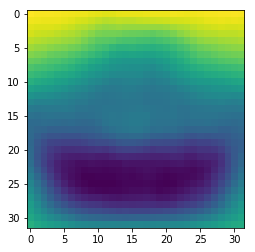

In [25]:
for c,wvs in enumerate(linelist):
    imgdata=wvs[0].reshape(32,32)
    print(imgdata)
    #imgdata=imgdata/
    plt.imshow(imgdata)
    plt.savefig('classifier'+str(c)+'.jpg')
    #img = Image.fromarray(imgdata,mode='L')
    #img.show()
    #img.save('classifier'+str(c)+'.jpg')
    #img.show()
    

    
    

In [13]:

test_data= tb['data']
test_labels=np.array(tb['labels'])

test_datargb=test_data.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
test_datagray=grayscale(test_datargb).reshape(10000,1024)
X=normalize(test_datagray,axis=1)
probvect=[]
for samp in X:# loop thrhough Test examples
    probclass=[]
    #print(X.shape)
    for c,wvs in enumerate(linelist): #loop through all weight vectors
        wv=np.array(wvs[0])
        b=wvs[1]
        prob=funcsig(wv,samp,b)
        probclass.append(prob)
    probvect.append(probclass)
    
print(probvect)
    

    
   

        

    
    

[[0.10058509639803387, 0.09917654342636391, 0.10123552960106155, 0.09894955845980674], [0.1055206986521788, 0.11585979038699444, 0.09371729461939027, 0.0866657114236122], [0.10542008700050308, 0.10880936827728076, 0.09420893059526886, 0.08946770459598824], [0.10579506733560151, 0.10507742031504512, 0.10001742024437182, 0.09172914799502424], [0.09513305114583921, 0.09245064927829913, 0.10296488351095319, 0.1096098003262966], [0.0993692689476262, 0.1043669099710718, 0.09897072047147934, 0.09758258662627958], [0.09315057596782345, 0.09828087899881807, 0.09653552001435572, 0.1058871302558122], [0.09875090749226896, 0.0967766906846185, 0.10378465514709645, 0.10230830174465677], [0.10074164754894706, 0.09690922313917967, 0.103197173086626, 0.1011367582062988], [0.10739333727292316, 0.10908136892299095, 0.09885395305232735, 0.08917011003790307], [0.09866584936175607, 0.09696609726587761, 0.10068438021450754, 0.10255756405221979], [0.10257580596379841, 0.11383082324442262, 0.09460839987892056,

In [24]:
classification_accuracies=[]
print(len(linelist))
for c,wvs in enumerate(linelist):#loop through all weight vectors
        corrclass=0
        wv=np.array(wvs[0])
        b=wvs[1]
        for count,samp in enumerate(X):
            prob=funcsig(wv,samp,b)
            #print(prob)
            if(prob>.49999999 and test_labels[count]==c):##correctly guesss this class
                corrclass+=1
            elif(prob<.49999999 and test_labels[count]!=c):
                corrclass+=1
        classification_accuracies.append(corrclass/10000)
print(classification_accuracies)
        
    


10
[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]


In [ ]:
cm=(10,10)
cm=np.zeros(cm)
print(cm)
for sam,probs in enumerate(probvect):
    cm[test_labels[sam],np.argmax(probs)]+=1
print(cm)

accuracy=np.sum(cm.diagonal())/100 # diagonal of array is correctly classified example

print("Total Accuracy is "+ str(accuracy) +"%")

    